In [2]:
from __future__ import division
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from hdf_tools import getcc
from hdf_tools.pytables_tools import read_packing
from packing_tools import V_harm

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\anisotropy
Populating the interactive namespace from numpy and matplotlib
Total # of packings:  83006
After (1.1):  68835
After (1.2):  62275
After (1.3):  61147
After (2.1):  60232
After (2.2):  59847
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59731


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\anisotropy
Populating the interactive namespace from numpy and matplotlib
Total # of packings:  83006
After (1.1):  68835
After (1.2):  62275
After (1.3):  61147
After (2.1):  60232
After (2.2):  59847
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59731


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


In [3]:
mask = (dataN == 256)
sdata = summ[mask]
print sum(mask)

6994


In [7]:
df = tables.File(base + "h5/N256~P1e-3_shear.h5")
packing = df.root.__getattr__('N256').__getattr__('P1e-3').__getattr__('9469')

In [ ]:
dataset = {}

for packing in df.root.__getattr__('N256').__getattr__('P1e-3'):
    befores, afters = getcc.get_first_ccs(packing)
    
    for b in befores[-1:-5:-1]:
        try:
            before_pack = df._get_node(b['path'])
            before_particles = before_pack.particles.read()
            before_pack = read_packing(before_pack)
            break
        except Exception, e:
            pass
    else:
        print packing._v_name, " -- before not found"
        continue

    for b in afters[:5]:
        try:
            after_pack = df._get_node(b['path'])
            after_particles = after_pack.particles.read()
            after_pack = read_packing(after_pack)
            break
        except Exception, e:
            pass
    else:
        print packing._v_name, " -- after not found"
        continue
        
    vb = V_harm.get_contacts(before_pack)
    before_conn = np.int_(vb['connmatrix'])
    after_conn = np.int_(V_harm.get_contacts(after_pack)['connmatrix'])

    diff = after_conn - before_conn

    if np.sum(diff != 0) != 2:
        print packing._v_name, " -- multiple CCs (%i)" % (np.sum(diff != 0)/2)
        continue

    i,j = np.where(diff != 0)
    i = i[0]; j = j[0]

    dataset[packing._v_name] = (vb['xij'][i,j], vb['yij'][i,j], np.sum(diff))

In [9]:
len(dataset)

810

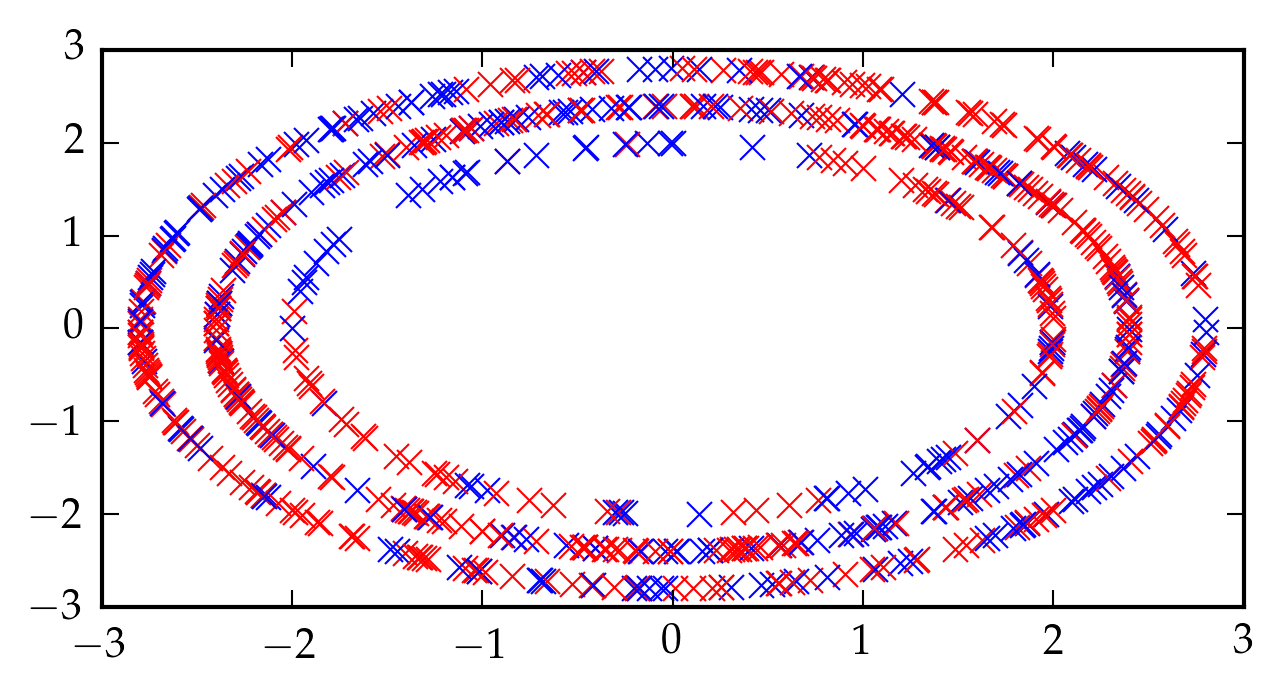

In [13]:
for k,v in dataset.iteritems():
    if v[2] > 0:
        color = 'blue'
    elif v[2] < 0:
        color = 'red'
    else:
        raise Exception
    plt.plot(v[0], v[1], "x", color=color)

In [26]:
data = np.array(dataset.values())
data.shape

mk_mask = data[:,2] > 0
bk_mask = data[:,2] < 0

print sum(mk_mask), sum(bk_mask)

angle = np.arctan(data[:,0] / data[:,1]) % np.pi

306 504


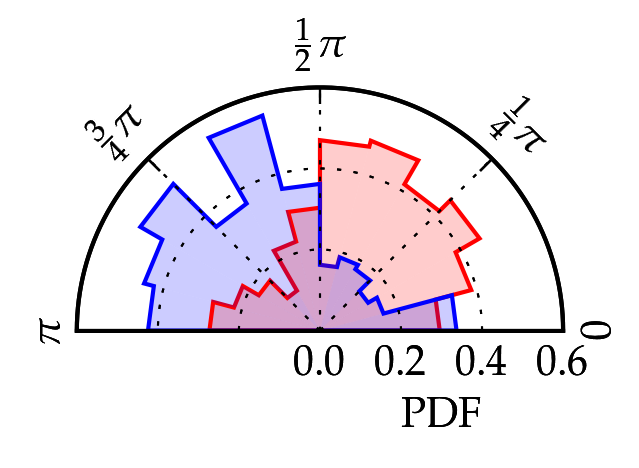

In [254]:
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, \
    ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import \
    GridHelperCurveLinear
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt

fig = halffig(hf=0.65)
rect = [0,0,1,1]
"""
Sometimes, things like axis_direction need to be adjusted.
"""

# rotate a bit for better orientation
tr_rotate = Affine2D().translate(-90, 0)

# scale degree to radians
#tr_scale = Affine2D().scale(np.pi/180., 1.)

tr = PolarAxes.PolarTransform()

angle_ticks = [(0, r"$0$"),
               (1*np.pi/4, r"$\frac{1}{4}\pi$"),
               (2*np.pi/4, r"$\frac{1}{2}\pi$"),
               (3*np.pi/4, r"$\frac{3}{4}\pi$"),
               (4*np.pi/4, r"$\pi$")]
grid_locator1 = FixedLocator([v for v, s in angle_ticks])
tick_formatter1 = DictFormatter(dict(angle_ticks))

grid_locator2 = FixedLocator([0,0.2,0.4,0.6])

ra0, ra1 = 0, np.pi
cz0, cz1 = 0, 0.6

grid_helper = floating_axes.GridHelperCurveLinear(
    tr, extremes=(ra0, ra1, cz0, cz1),
    grid_locator1=grid_locator1,
    tick_formatter1=tick_formatter1,
    grid_locator2=grid_locator2,
)
ax1 = floating_axes.FloatingSubplot(fig, 111, grid_helper=grid_helper)
fig.add_subplot(ax1)

# adjust axis
ax1.axis["left"].set_axis_direction("bottom")
ax1.axis["right"].set_axis_direction("top")

ax1.axis["bottom"].set_visible(False)
ax1.axis["top"].set_axis_direction("bottom")
ax1.axis["top"].toggle(ticklabels=True)

ax1.axis["top"].major_ticklabels.set_axis_direction("top")

ax1.axis["top"].label.set_axis_direction("top")#

ax1.axis["left"].label.set_text(r"PDF")
ax1.axis["left"].major_ticks.set_visible(False)
ax1.axis["right"].major_ticks.set_visible(False)
#ax1.axis["top"].label.set_text(r"$\tan^{-1}(x/y)$")

ax1.grid() #axis='y')

# create a parasite axes whose transData in RA, cz
aux_ax = ax1.get_aux_axes(tr)

aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
# drawn twice, and possibly over some other
# artists. So, we decrease the zorder a bit to
# prevent this

N = 13
theta_edges = np.linspace(0, np.pi, N)

aux_ax.hist(angle[mk_mask], bins=theta_edges, histtype='step', color='blue', normed=True) #, hatch='//', lw=0.5)
aux_ax.hist(angle[bk_mask], bins=theta_edges, histtype='step', color='red', normed=True) #, hatch='\\\\', lw=0.5)

aux_ax.hist(angle[mk_mask], bins=theta_edges, histtype='bar', normed=True, lw=0, color=(0,0,1,0.2), ec='blue')
aux_ax.hist(angle[bk_mask], bins=theta_edges, histtype='bar', normed=True, lw=0, fc=(1,0,0,0.2), ec='red')

plt.savefig('anisotropy-one.pdf', bbox_inches='tight')